In [1]:
import joblib
import pandas as pd


In [5]:
# load saved model
model = joblib.load("../models/model_rf.joblib")
data_test = pd.read_csv("../data/Training/Encoded_test.csv")


### Build a TreeExplainer and compute Shaplay Values

In [6]:
from shap.plots import *

c:\Users\Rania\Desktop\PROJECT_BGD\project_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
data_reduce = data_test[:20]
data_reduce.shape

(20, 120)

In [8]:
# generate explanations for the model
import shap

# Build a TreeExplainer
Explainer = shap.TreeExplainer(model)


In [9]:
shap_values = Explainer.shap_values(data_reduce)

### Visualize explanations for a specific point of your data set,

In [10]:
data_test.loc[[200]]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
200,0,0,0,1,0,112500.0,552555.0,24466.5,477000.0,7,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
# Calculate Shap values
choosen_instance = data_test.loc[[200]]
shap_values1 = Explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(Explainer.expected_value[1], shap_values1[1], choosen_instance)

### Visualize explanations for all points of  your data set at once

In [12]:
shap.initjs()
shap.force_plot(Explainer.expected_value[1], shap_values[1], data_reduce)

### Visualize a summary plot for each class on the whole dataset.

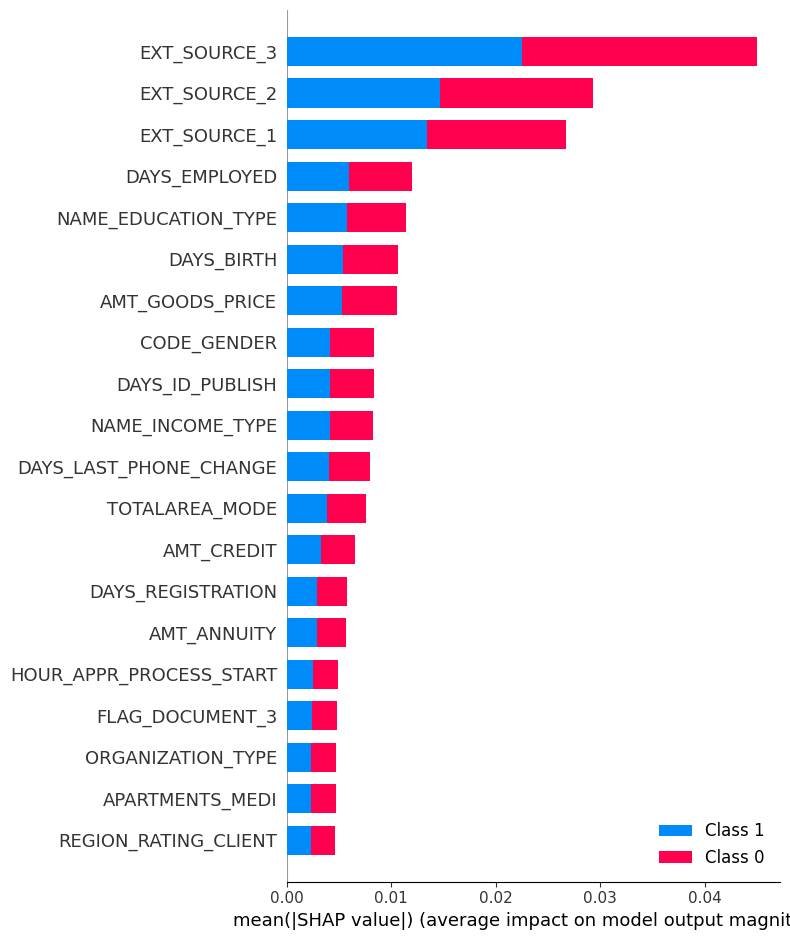

In [13]:
# Visualize explanations for all points of your data set at once
shap.summary_plot(shap_values, data_reduce, plot_type='bar')